In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [3]:
# Configure inline plotting
%matplotlib inline

# Set visual styles
sns.set(style="whitegrid")

In [6]:
df= pd.read_csv(r"C:\Users\epist\Downloads\Final_SP_dataSet.csv")


In [7]:
df.head(6)

,Age,Gender,Stress Level,Academic Performance,Health Condition,Relationship Condition,Family Problem,Depression Level,Anxiety Level,Mental Support,Self Harm Story,Suicide Attempt
0,22,Female,Low,Good,Normal,In a relationship,NaN,Always,Always,Family,No,Never Thought
1,23,Male,High,Good,Fair,Single,NaN,Always,Often,loneliness,Yes,Attempted
2,19,Female,Moderate,Poor,Normal,Breakup,Parental conflict,Often,Often,Friends,Yes,Thought
3,18,Female,High,Average,Abnormal,Single,Financial,Always,Often,loneliness,Yes,Thought
4,19,Female,Low,Good,Fair,Single,NaN,Sometimes,Sometimes,Family,No,Never Thought
5,21,Female,Low,Excellent,Normal,In a relationship,Financial,Sometimes,Sometimes,Friends,No,Never Thought


In [8]:
# Data Cleaning and Preprocessing

# Check if the dataset is empty
if df.empty:
    raise ValueError('The input dataset is empty. Please check the file and its path.')

# Examine unique values for the target variable 'Suicide Attempt'
print("Unique values in 'Suicide Attempt':", df['Suicide Attempt'].unique())

# Encode the target variable
if set(df['Suicide Attempt'].str.lower().unique()) <= {"yes", "no"}:
    df['Suicide Attempt'] = df['Suicide Attempt'].str.lower().map({'yes': 1, 'no': 0})
else:
    le = LabelEncoder()
    df['Suicide Attempt'] = le.fit_transform(df['Suicide Attempt'])

# Apply one-hot encoding to the remaining categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Quick check of the transformed data
print("\nData after encoding:")
display(df_encoded.head())

Unique values in 'Suicide Attempt': ['Never Thought' 'Attempted' 'Thought']

Data after encoding:


,Age,Suicide Attempt,Gender_Male,Stress Level_Low,Stress Level_Moderate,Academic Performance_Excellent,Academic Performance_Good,Academic Performance_Poor,Health Condition_Fair,Health Condition_Normal,...,Family Problem_Parental conflict,Depression Level_Often,Depression Level_Sometimes,Depression Level_pf,Anxiety Level_Often,Anxiety Level_Sometimes,Anxiety Level_sometimes,Mental Support_Friends,Mental Support_loneliness,Self Harm Story_Yes
0,22,1,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,23,0,True,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
2,19,2,False,False,True,False,False,True,False,True,...,True,True,False,False,True,False,False,True,False,True
3,18,2,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
4,19,1,False,True,False,False,True,False,True,False,...,False,False,True,False,False,True,False,False,False,False


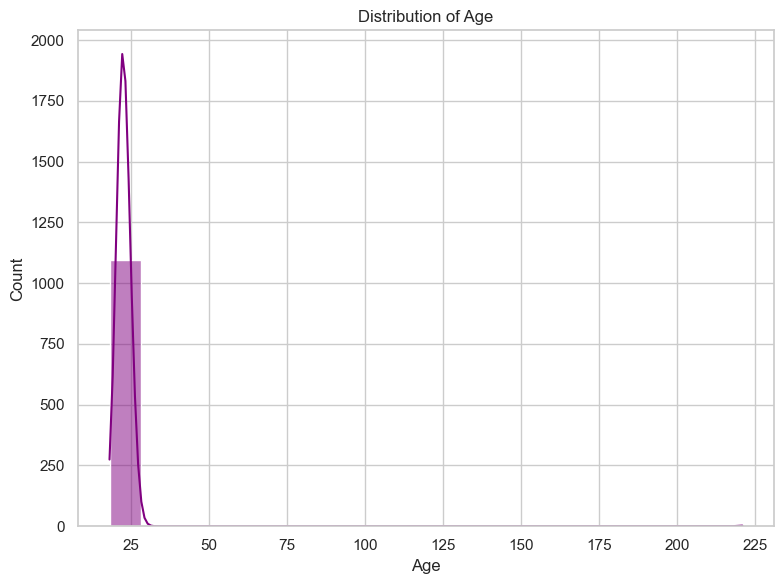

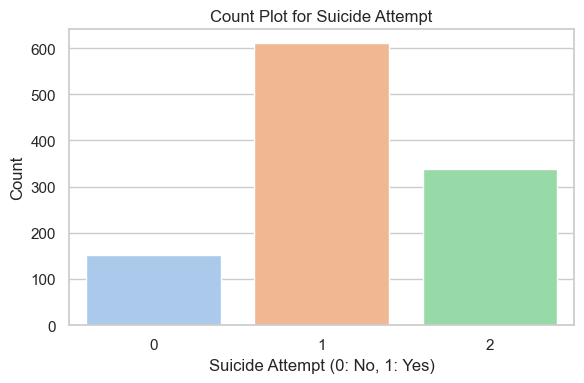

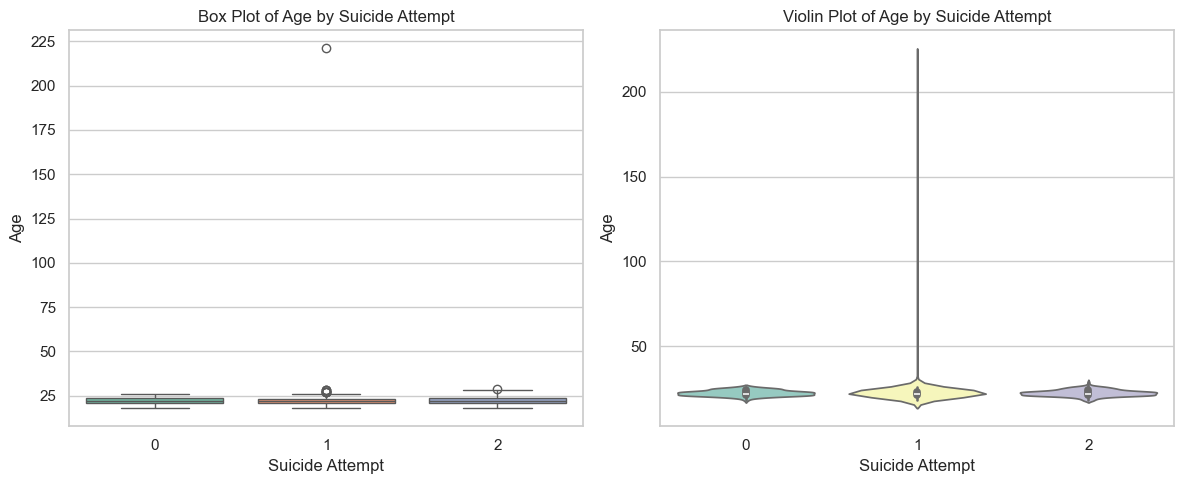

In [9]:
# Visualizing the numeric feature: Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Count plot for the target variable 'Suicide Attempt'
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Suicide Attempt'], palette='pastel')
plt.title('Count Plot for Suicide Attempt')
plt.xlabel('Suicide Attempt (0: No, 1: Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Box plot and violin plot for Age grouped by Suicide Attempt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Suicide Attempt'], y=df['Age'], palette='Set2')
plt.title('Box Plot of Age by Suicide Attempt')

plt.subplot(1, 2, 2)
sns.violinplot(x=df['Suicide Attempt'], y=df['Age'], palette='Set3')
plt.title('Violin Plot of Age by Suicide Attempt')

plt.tight_layout()
plt.show()

In [10]:
if 'Suicide Attempt' not in df_encoded.columns:
    raise ValueError("Target column 'Suicide Attempt' not found in the preprocessed dataframe.")

X = df_encoded.drop('Suicide Attempt', axis=1)
y = df_encoded['Suicide Attempt']

# Check that we have a non-empty dataset
if X.shape[0] == 0:
    raise ValueError('The feature matrix is empty after preprocessing. Please check the encoding process.')

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if X_train.shape[0] == 0:
    raise ValueError('Training set is empty after splitting. Adjust the test_size or check the input data.')

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

Accuracy Score: 0.8091


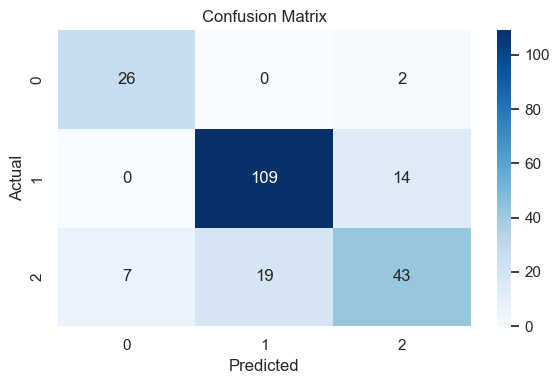

ROC Curve requires binary labels. Please ensure that the target variable is encoded correctly.


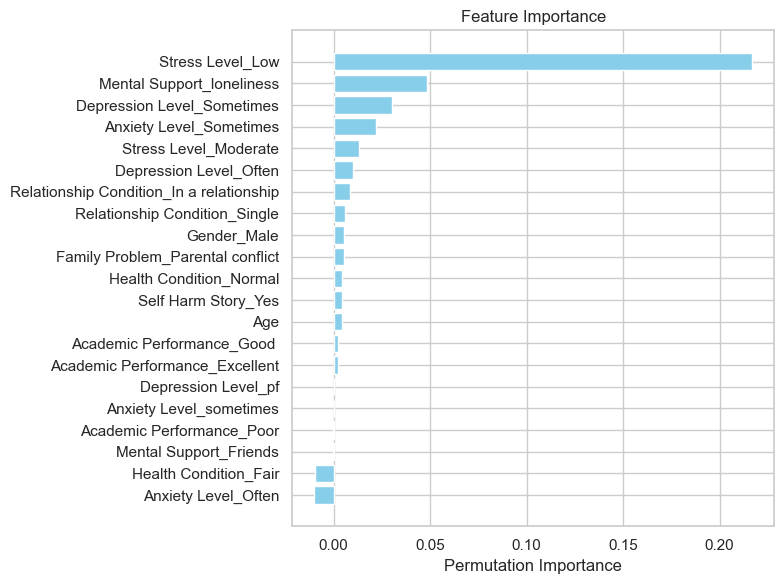

In [12]:
print(f'Accuracy Score: {accuracy:.4f}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
# Ensure y_test is binary for ROC calculation
if set(y_test.unique()) <= {0, 1}:
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
else:
    print('ROC Curve requires binary labels. Please ensure that the target variable is encoded correctly.')

# Permutation Importance to evaluate feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
importance_df = pd.DataFrame({'feature': X_test.columns, 'importance': result.importances_mean})
importance_df = importance_df.sort_values(by='importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()